# 1. Introduction

In this notebook I will try to analyze the season performance of some Atletico de Madrid players. I have searched the necessary data in different webs and data bases and filled a .csv from this data.

# 2. Previous steps

Before start the analysis I need make some imports and make some adjustments in the data.

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [26]:
data = pd.read_csv('/kaggle/input/playerdata/Datos-Jugadores.csv', delimiter=';') #Get the data
data.columns

Index(['Name', 'ID', 'Position', 'Club ', 'Goals', 'Assists', 'Recoveries',
       'Ball Losses', 'ScssPass', 'FailPass', 'ShotOntarget', 'ShotsOut',
       'Offsides', 'ScssTackle', 'FailTackle', 'RecivedTackle', 'Fouls',
       'ScssDuel', 'FailDuel', 'CreatedChances', 'ScssDribling',
       'FailDribling', 'ScssLongPass', 'FailLongPass', 'Clearances',
       'TimesDribled', 'PenaltyGenerated', 'PenaltyConceded',
       'AerialBattleWon', 'AerialBattleLost', 'Blocked Shots', 'Interceptions',
       'YellowCard', 'RedCard', 'MachesPlayed', 'MinutesPlayed'],
      dtype='object')

As you can see, the column 'Club' have an empty space at the end, this could cause some problems in the future, so I should remove this empty space.

In [27]:
data = data.rename(columns = {'Club ': 'Club'}) #Rename the column name to remove the empty space at the end
data.columns

Index(['Name', 'ID', 'Position', 'Club', 'Goals', 'Assists', 'Recoveries',
       'Ball Losses', 'ScssPass', 'FailPass', 'ShotOntarget', 'ShotsOut',
       'Offsides', 'ScssTackle', 'FailTackle', 'RecivedTackle', 'Fouls',
       'ScssDuel', 'FailDuel', 'CreatedChances', 'ScssDribling',
       'FailDribling', 'ScssLongPass', 'FailLongPass', 'Clearances',
       'TimesDribled', 'PenaltyGenerated', 'PenaltyConceded',
       'AerialBattleWon', 'AerialBattleLost', 'Blocked Shots', 'Interceptions',
       'YellowCard', 'RedCard', 'MachesPlayed', 'MinutesPlayed'],
      dtype='object')

In [28]:
pd.set_option('display.max_columns', None)
data

,Name,ID,Position,Club,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed,MinutesPlayed
0,Felipe Monteiro,1,CB,Atletico Madrid,0,0,126,169,887,159,2,9,0,17,12,14,29,121,59,4,3,0,0,1,127,0,0,0,77,28,15,36,8,0,31,2051
1,Jose María Giménez,2,CB,Atletico Madrid,0,0,82,158,964,138,5,7,2,7,13,17,19,83,55,4,1,1,0,1,61,1,0,0,46,34,11,21,5,0,21,1766
2,Stefan Savic,3,CB,Atletico Madrid,1,0,156,275,1482,258,2,3,3,25,15,16,28,151,89,2,6,0,1,2,101,0,0,1,91,50,19,41,15,0,33,2954
3,Mario Hermoso,4,CB,Atletico Madrid,1,1,151,353,1492,279,5,10,3,31,24,30,30,127,99,10,9,2,2,6,63,2,0,0,34,39,10,36,5,0,31,2583
4,Kieran trippier,5,RB,Atletico Madrid,0,6,146,450,1183,307,1,1,6,39,22,15,30,135,92,34,19,6,15,51,47,6,0,0,41,24,4,40,0,0,28,2477
5,Renan Lodi,6,LB,Atletico Madrid,1,2,73,209,477,98,3,5,2,17,13,27,19,90,59,12,23,7,9,39,15,7,0,0,10,16,0,16,3,0,23,1124
6,Sime Vrsaljko,7,RB,Atletico Madrid,0,0,21,122,164,62,0,0,1,12,6,4,8,39,28,0,1,1,3,22,9,1,0,0,18,14,0,8,2,0,9,519
7,Ricard Sánchez,8,RB,Atletico Madrid,0,0,1,8,8,5,0,1,0,1,0,0,0,1,3,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,29
8,Kondogbia,9,DM,Atletico Madrid,0,0,61,103,489,84,1,5,0,29,17,23,27,59,39,4,10,2,0,2,8,4,0,0,6,10,5,11,5,0,30,1035
9,Héctor Herrera,10,DM,Atletico Madrid,0,1,59,83,590,65,1,5,1,7,5,6,9,37,35,6,4,2,0,3,7,2,0,0,15,15,2,14,2,0,15,680


In the above table I show the entire dataset, but we have a problem, we don't have a row with the total club statistics, and it is an important row because if we don't have it we can't compare the season influence of each player. Let's to create it. 

In [29]:
club = data.groupby(['Club']).sum().reset_index()
club

,Club,ID,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed,MinutesPlayed
0,Atletico Madrid,231,65,53,1881,4641,14932,2734,182,185,91,372,258,444,485,1927,1785,342,366,213,73,317,580,215,5,4,528,487,82,383,99,0,521,34185


Once the desired row is created, we need to append it in the original dataset.

In [30]:
data = data.append(club)
data.tail() #Show the last rows of our dataset

,Name,ID,Position,Club,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed,MinutesPlayed
17,João Félix,18,AM,Atletico Madrid,7,5,63,235,560,107,16,15,5,4,4,48,16,107,122,21,30,30,0,10,2,30,1,0,21,31,0,5,6,0,31,1570
18,Ángel Correa,19,AM/FW,Atletico Madrid,9,8,118,386,684,171,23,18,13,21,17,30,37,131,193,38,53,37,5,25,12,37,0,0,11,34,1,22,3,0,38,2410
19,Moussa Dembele,20,FW,Atletico Madrid,0,0,2,20,20,11,2,4,3,0,0,0,3,7,9,1,2,0,0,0,0,0,0,0,5,6,0,1,0,0,5,95
20,Luis Suárez,21,FW,Atletico Madrid,21,3,38,282,85,37,43,44,33,7,4,40,21,90,99,27,13,20,4,4,13,20,2,0,26,27,0,5,6,0,32,2519
0,NaN,231,NaN,Atletico Madrid,65,53,1881,4641,14932,2734,182,185,91,372,258,444,485,1927,1785,342,366,213,73,317,580,215,5,4,528,487,82,383,99,0,521,34185


As we see, the row has been added succesfully, but we have NaN values, bad index number, the ID number also the sum of all ID values from players... We have to modify it.

In [31]:
data.iloc[21,0:3] = ['Total', 22, 'Club'] #Modify the Name, ID, and Position columns
data.tail() #Show the last 5 rows

,Name,ID,Position,Club,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed,MinutesPlayed
17,João Félix,18,AM,Atletico Madrid,7,5,63,235,560,107,16,15,5,4,4,48,16,107,122,21,30,30,0,10,2,30,1,0,21,31,0,5,6,0,31,1570
18,Ángel Correa,19,AM/FW,Atletico Madrid,9,8,118,386,684,171,23,18,13,21,17,30,37,131,193,38,53,37,5,25,12,37,0,0,11,34,1,22,3,0,38,2410
19,Moussa Dembele,20,FW,Atletico Madrid,0,0,2,20,20,11,2,4,3,0,0,0,3,7,9,1,2,0,0,0,0,0,0,0,5,6,0,1,0,0,5,95
20,Luis Suárez,21,FW,Atletico Madrid,21,3,38,282,85,37,43,44,33,7,4,40,21,90,99,27,13,20,4,4,13,20,2,0,26,27,0,5,6,0,32,2519
0,Total,22,Club,Atletico Madrid,65,53,1881,4641,14932,2734,182,185,91,372,258,444,485,1927,1785,342,366,213,73,317,580,215,5,4,528,487,82,383,99,0,521,34185


And now it's time to modify the index. Why? Because if we want to look at the stats of one or more player it is easier to search for this player by his name not by a number.

In [32]:
data = data.set_index('Name')
data

,ID,Position,Club,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed,MinutesPlayed
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Felipe Monteiro,1,CB,Atletico Madrid,0,0,126,169,887,159,2,9,0,17,12,14,29,121,59,4,3,0,0,1,127,0,0,0,77,28,15,36,8,0,31,2051
Jose María Giménez,2,CB,Atletico Madrid,0,0,82,158,964,138,5,7,2,7,13,17,19,83,55,4,1,1,0,1,61,1,0,0,46,34,11,21,5,0,21,1766
Stefan Savic,3,CB,Atletico Madrid,1,0,156,275,1482,258,2,3,3,25,15,16,28,151,89,2,6,0,1,2,101,0,0,1,91,50,19,41,15,0,33,2954
Mario Hermoso,4,CB,Atletico Madrid,1,1,151,353,1492,279,5,10,3,31,24,30,30,127,99,10,9,2,2,6,63,2,0,0,34,39,10,36,5,0,31,2583
Kieran trippier,5,RB,Atletico Madrid,0,6,146,450,1183,307,1,1,6,39,22,15,30,135,92,34,19,6,15,51,47,6,0,0,41,24,4,40,0,0,28,2477
Renan Lodi,6,LB,Atletico Madrid,1,2,73,209,477,98,3,5,2,17,13,27,19,90,59,12,23,7,9,39,15,7,0,0,10,16,0,16,3,0,23,1124
Sime Vrsaljko,7,RB,Atletico Madrid,0,0,21,122,164,62,0,0,1,12,6,4,8,39,28,0,1,1,3,22,9,1,0,0,18,14,0,8,2,0,9,519
Ricard Sánchez,8,RB,Atletico Madrid,0,0,1,8,8,5,0,1,0,1,0,0,0,1,3,0,0,0,2,0,1,0,0,0,0,1,0,0,0,0,1,29
Kondogbia,9,DM,Atletico Madrid,0,0,61,103,489,84,1,5,0,29,17,23,27,59,39,4,10,2,0,2,8,4,0,0,6,10,5,11,5,0,30,1035


Now, if we want to take a look at player's stats we can do it in the following way:

In [33]:
player_stats = data.loc['Yannick Carrasco' , :]
print(player_stats)

ID                               17
Position                         LM
Club                Atletico Madrid
Goals                             6
Assists                          10
Recoveries                      151
Ball Losses                     445
ScssPass                        683
FailPass                        163
ShotOntarget                     24
ShotsOut                         12
Offsides                          4
ScssTackle                       15
FailTackle                       12
RecivedTackle                    33
Fouls                            31
ScssDuel                        128
FailDuel                        162
CreatedChances                   47
ScssDribling                     66
FailDribling                     54
ScssLongPass                      7
FailLongPass                     40
Clearances                       10
TimesDribled                     54
PenaltyGenerated                  0
PenaltyConceded                   1
AerialBattleWon             

As we know, the humans are better at interpreting a plot than at interpreting numbers, so in the next section I will to create the necessary tables to compare players easily.

# GLOBAL INFLUENCE 

In this section we will compare the total influence on a player's season respect to to the team season. The first step is to create the functions that allow us look the player influence in attack and the player influence in defense. Also we need a function that use this two influences to get the total influence.

Note: I know in the football more variables are involved, like pass, success duels, etc., but I'm not used this variables because the complexity of the problem grow a lot and some times the influence of these variables is subjective. 

In [34]:
#Create a function that calculate the attack influence in the season
def attack_influence(name):
    try:
        cols = ['Goals', 'Assists', 'ShotOntarget', 'CreatedChances', 'PenaltyGenerated'] #Get interesting columns
        
        sumpai = data.loc[name, cols].sum() #Player attack influence
        totpai = data.loc['Total', cols].sum() #Total attack influence
        
        AIE = round((sumpai/totpai)*100, 2) #Attack influence estimated
        
        return AIE
    
    except:
        print('Something was wrong, try again.')
        
#Create a function that calculate the defense influence in the season
def defensive_influence(name):
    try:
        cols = ['Recoveries', 'Clearances', 'Blocked Shots', 'Interceptions'] #Get interesting columns
       
        sumpdi = data.loc[name, cols].sum() #Player defense influence
        totpdi = data.loc['Total', cols].sum() #Total defense influence
        
        PDIE = round((sumpdi/totpdi)*100, 2) #Defensive influence estimated
        
        return PDIE
    
    except:
        print('Something was wrong, try again.')
        

#Calculate the total influence
def total_influence(name):
    return round(((attack_influence(name) + defensive_influence(name)))/2,2)

Now I will use these functions to create a dataframe with the total influence of each player.

In [35]:
influence = pd.DataFrame(columns=['Name', 'Influence'])
for name in data.index:
    tot = total_influence(name)
    influence = influence.append({'Name': name, 'Influence':tot}, ignore_index=True)

In [36]:
influence

,Name,Influence
0,Felipe Monteiro,5.66
1,Jose María Giménez,3.68
2,Stefan Savic,5.80
3,Mario Hermoso,5.76
4,Kieran trippier,7.22
5,Renan Lodi,3.16
6,Sime Vrsaljko,0.65
7,Ricard Sánchez,0.04
8,Kondogbia,1.84
9,Héctor Herrera,2.02



The above table is good but could be better if we could visualize the data in a plot. Let's to do it.

In [37]:
influence = influence[influence['Name'] != 'Total'] #Remove the total row
influence = influence.sort_values('Influence')

<BarContainer object of 21 artists>

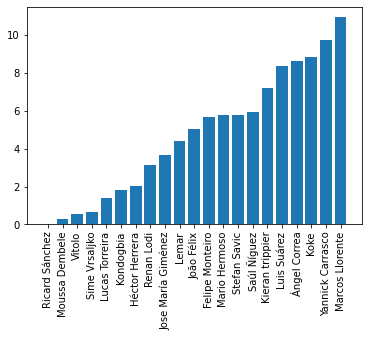

In [38]:
import matplotlib.pyplot as plt
x = influence['Name'] 
y = influence['Influence']
plt.xticks(rotation='vertical')
plt.bar(x,y)

Now we can see graphically the total player's influence in the season. But what if we want to compare all the stats of each player, or we want to hire a player but the overall influence doesn't work for us and we want go deeper? 
For this case the best option is to use a radar chart. 

Before to code the radar charts we must create a dataset with standardized values. The main reason is that we are goig to code a plot used for the global variables (Success pass,number of offside, Aerial battle won...) and the range of these values of all these variables are different, this could lead us to a bad visualization of the data

In [39]:
from sklearn.preprocessing import StandardScaler #Import the necessary packages to standardize the values
data_sc = data.loc[:, ~data.columns.isin(['Position', 'Club', 'ID'])] #Select all the columns but Position, club and id
sc = StandardScaler()
data_sc = sc.fit_transform(data_sc) #Standarize the values

cols = data.columns #Get all columns from data 
cols = cols.drop(['Position', 'ID', 'Club']) #Drop the unnecessary columns

#Create the dataset with the standardized values.
data_sc = pd.DataFrame(data_sc, columns = cols, index = data.index)
data_sc = data_sc.drop(columns = ['MinutesPlayed'])

data_sc

,Goals,Assists,Recoveries,Ball Losses,ScssPass,FailPass,ShotOntarget,ShotsOut,Offsides,ScssTackle,FailTackle,RecivedTackle,Fouls,ScssDuel,FailDuel,CreatedChances,ScssDribling,FailDribling,ScssLongPass,FailLongPass,Clearances,TimesDribled,PenaltyGenerated,PenaltyConceded,AerialBattleWon,AerialBattleLost,Blocked Shots,Interceptions,YellowCard,RedCard,MachesPlayed
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Felipe Monteiro,-0.426159,-0.437092,-0.119073,-0.271730,-0.156357,-0.163013,-0.386185,-0.206421,-0.427607,-0.224276,-0.221018,-0.295824,-0.155127,-0.140504,-0.287681,-0.389591,-0.404546,-0.434452,-0.438583,-0.428273,0.620530,-0.435001,-0.406894,-0.412568,0.269674,-0.166144,0.441927,0.015341,-0.050120,0.0,-0.157515
Jose María Giménez,-0.426159,-0.437092,-0.235500,-0.283548,-0.130766,-0.201242,-0.306534,-0.259226,-0.324230,-0.357629,-0.201722,-0.262162,-0.257922,-0.239046,-0.298824,-0.389591,-0.431272,-0.412016,-0.438583,-0.428273,0.069117,-0.412745,-0.406894,-0.412568,-0.018598,-0.104884,0.207653,-0.179369,-0.200479,0.0,-0.253774
Stefan Savic,-0.354039,-0.437092,-0.039691,-0.157842,0.041393,0.017211,-0.386185,-0.364837,-0.272541,-0.117593,-0.163132,-0.273383,-0.165406,-0.062708,-0.204112,-0.418353,-0.364455,-0.434452,-0.372495,-0.412878,0.403306,-0.435001,-0.406894,0.721995,0.399861,0.058475,0.676202,0.080244,0.300718,0.0,-0.138263
Mario Hermoso,-0.354039,-0.346375,-0.052921,-0.074037,0.044717,0.055441,-0.306534,-0.180018,-0.272541,-0.037581,0.010525,-0.116290,-0.144847,-0.124945,-0.176255,-0.303306,-0.324365,-0.389579,-0.306407,-0.351296,0.085826,-0.390489,-0.406894,-0.412568,-0.130187,-0.053834,0.149084,0.015341,-0.200479,0.0,-0.157515
Kieran trippier,-0.426159,0.107211,-0.066152,0.030181,-0.057980,0.106413,-0.412735,-0.417642,-0.117475,0.069101,-0.028066,-0.284604,-0.144847,-0.104199,-0.195755,0.041835,-0.190732,-0.299833,0.552735,0.341499,-0.047850,-0.301466,-0.406894,-0.412568,-0.065094,-0.206984,-0.202328,0.067264,-0.451078,0.0,-0.186393
Renan Lodi,-0.354039,-0.255658,-0.259314,-0.228753,-0.292621,-0.274060,-0.359635,-0.312032,-0.324230,-0.224276,-0.201722,-0.149952,-0.257922,-0.220893,-0.287681,-0.274544,-0.137278,-0.277397,0.156208,0.156754,-0.315202,-0.279210,-0.406894,-0.412568,-0.353366,-0.288664,-0.436603,-0.244273,-0.300718,0.0,-0.234523
Sime Vrsaljko,-0.426159,-0.437092,-0.396910,-0.322227,-0.396648,-0.339596,-0.439286,-0.444045,-0.375918,-0.290952,-0.336789,-0.408034,-0.370996,-0.353146,-0.374036,-0.447115,-0.431272,-0.412016,-0.240319,-0.104969,-0.365330,-0.412745,-0.406894,-0.412568,-0.278973,-0.309084,-0.436603,-0.348118,-0.350838,0.0,-0.369286
Ricard Sánchez,-0.426159,-0.437092,-0.449831,-0.444711,-0.448495,-0.443361,-0.439286,-0.417642,-0.427607,-0.437641,-0.452560,-0.452917,-0.453232,-0.451688,-0.443677,-0.447115,-0.444636,-0.434452,-0.306407,-0.443669,-0.432168,-0.435001,-0.406894,-0.412568,-0.446357,-0.441813,-0.436603,-0.451964,-0.451078,0.0,-0.446293
Kondogbia,-0.426159,-0.437092,-0.291067,-0.342641,-0.288633,-0.299546,-0.412735,-0.312032,-0.427607,-0.064252,-0.124542,-0.194836,-0.175686,-0.301282,-0.343394,-0.389591,-0.311002,-0.389579,-0.438583,-0.412878,-0.373685,-0.345977,-0.406894,-0.412568,-0.390562,-0.349924,-0.143759,-0.309176,-0.200479,0.0,-0.167141


**Radar Chart**

Now we can proceed with the definition function needed to show the desired plots.

In [40]:
def compare_attack_plot(first, second):
    try:
        import plotly.graph_objects as go
        cols = ['Goals', 'Assists', 'ShotOntarget', 'CreatedChances','PenaltyGenerated' ] #Select the desired columns
    
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(r = data.loc[first, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = first)) #Plot for first player
    
        fig.add_trace(go.Scatterpolar(r = data.loc[second, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = second)) #Plot for second player
        
        fig.update_layout(polar = dict(radialaxis=dict(visible=True),), showlegend = True)
        fig.show()
    except:
        print('Something was wrong.')
    
def compare_defense_plot(first, second):
    try:
        import plotly.graph_objects as go
        cols = ['Recoveries', 'Clearances','Blocked Shots', 'Interceptions'] #Select the desired columns 
    
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(r = data.loc[first, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = first)) #Plot for first player
    
        fig.add_trace(go.Scatterpolar(r = data.loc[second, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = second)) #Plot for second player
    
        fig.update_layout(polar = dict(radialaxis = dict (visible = True),), showlegend = True)
        fig.show()
    except:
        print('Something was wrong.')
        
def compare_global_plot(first, second):
    try:
        import plotly.graph_objects as go
        cols = ['Ball Losses','FailPass','ShotsOut', 'Offsides', 'FailTackle','Fouls', 'FailDuel', 'FailDribling', 'FailLongPass', 
                'TimesDribled','AerialBattleLost', 'ScssPass', 'RecivedTackle', 'ScssTackle', 'ScssDribling', 
                'ScssDuel', 'AerialBattleWon','ScssLongPass'] #Select the desired columns
        
    
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar(r = data_sc.loc[first, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = first)) #Plot for first player
    
        fig.add_trace(go.Scatterpolar(r = data_sc.loc[second, cols],
                                      theta = cols, 
                                      fill = 'toself',
                                      name = second)) #Plot for second player
    
        fig.update_layout(polar = dict(radialaxis = dict (visible = True),), showlegend = True)
        fig.show()
    except:
        print('Something was wrong.')

Now the funcions are builded, we can call it to show and compare the stats of each player.

In [41]:
compare_defense_plot('Stefan Savic', 'Felipe Monteiro') #Compare two deffensive players

In [42]:
compare_attack_plot('Marcos Llorente', 'Luis Suárez') #Compare to attack players

In [43]:
compare_global_plot('Koke', 'Saúl Ñíguez')

# INFLUENCE PER MATCH

Now we want to compare the influence per match of each player, the reason is because a player may have had little influence on the season, but it may be due to an injury and he could have played a match and had a lot of influence on the match played. To show this I will calculate and show the influence of each player in 90 minutes. 

In [44]:
#Statiscs per match, or the same: Which is the average influence of a player in one match.

def match_influence(name): #Funtion to calculate the influence per match
    try:
        values = np.empty(35, dtype = float) #Create a numpy array to save the values
        count = 0 #Counter variable
        mins = data.loc[name, 'MinutesPlayed'] #Minutes played for the selected player
            
        for col in data_sc.columns: #Go trhough all the data_sc columns
            value = data.loc[name, col] #Save the value of actual column
            match = round((value*90)/mins,2) #Calculate the value per match
            values[count] = match #Fill the array with the above value
            count+=1 #Increase the counter
        
        return values
    
    except:
        print('Something was wrong')
        
def match_attack_influence(name): #Funtion to calculate the attack influence per match
    try: 
        values = np.empty(5, dtype = float)  #Create a numpy array to save the values
        count = 0 #Counter variable
        cols = ['Goals', 'Assists', 'ShotOntarget', 'CreatedChances','PenaltyGenerated'] #Select the desired columns
        mins = data.loc[name, 'MinutesPlayed']  #Minutes played for the selected player
            
        for col in cols: #Go through selected columns
            value = data.loc[name, col] #Save the value of actual column
            match = round((value*90)/mins,2) #Calculate the value per match
            values[count] = match #Fill the array with the above value
            count+=1 #Increase the counter
       
        return values
    
    except:
        print('Something was wrong')


def match_defense_influence(name):  #Funtion to calculate the defenssive influence per match
    try:
        values = np.empty(4, dtype = float) #Create a numpy array to save the values
        count = 0  #Counter variable
        cols = ['Recoveries', 'Clearances', 'Blocked Shots', 'Interceptions'] #Select the desired columns
        mins = data.loc[name, 'MinutesPlayed'] #Minutes played for the selected player
        
        for col in cols: #Go through selected columns
            value = data.loc[name, col] #Save the value of actual column
            match = round((value*90)/mins,2) #Calculate the value per match
            values[count] = match #Fill the array with the above value
            count+=1 #Increase the counter
        
        return values
    
    except:
        print('Something was wrong') 

In [45]:
match_defense_influence('Koke')

array([6.6 , 1.07, 0.18, 1.07])

In [46]:
#Grpahical information about influence per match
def plot_match_influence(first, second):
    data_first = match_influence(first) #Calculate the match influence for first player
    data_second = match_influence(second)#Calculate the match influence for second player
    try:
        import plotly.graph_objects as go
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar( r = data_first,
                                       theta = data_ok.columns,
                                       fill = 'toself',
                                       name = first)) #Plot for first player
    
        fig.add_trace(go.Scatterpolar( r = data_second,
                                       theta = data_ok.columns, 
                                       fill = 'toself',
                                       name = second)) #Plot for second player
    
        fig.update_layout(polar = dict(radialaxis=dict(visible=True),), showlegend = True)
        fig.show()
    
    except:
        print('Something was wrong.')
        

def plot_match_attack_influence(first, second):
    data_first = match_attack_influence(first) #Calculate the attack influence for first player
    data_second = match_attack_influence(second) #Calculate the attack influence for second player
    cols = ['Goals', 'Assists', 'ShotOntarget', 'CreatedChances','PenaltyGenerated'] #Select the desired columns
    
    try:
        import plotly.graph_objects as go
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar( r = data_first,
                                       theta = cols,
                                       fill = 'toself',
                                       name = first)) #Plot for first player
    
        fig.add_trace(go.Scatterpolar( r = data_second,
                                       theta = cols, 
                                       fill = 'toself',
                                       name = second)) #Plot for second player
    
        fig.update_layout(polar = dict(radialaxis=dict(visible=True),), showlegend = True)
        fig.show()
    
    except:
        print('Something was wrong.')

def plot_match_defense_influence(first, second):
    data_first = match_defense_influence(first)  #Calculate the defensive influence for first player
    data_second = match_defense_influence(second) #Calculate the defensive influence for second player
    cols = ['Recoveries', 'Clearances', 'Blocked Shots', 'Interceptions'] #Select the desired columns
   
    try:
        import plotly.graph_objects as go
        fig = go.Figure()
        fig.add_trace(go.Scatterpolar( r = data_first,
                                       theta = cols,
                                       fill = 'toself',
                                       name = first))  #Plot for first player
    
        fig.add_trace(go.Scatterpolar( r = data_second,
                                       theta = cols, 
                                       fill = 'toself',
                                       name = second))  #Plot for second player
    
        fig.update_layout(polar = dict(radialaxis=dict(visible=True),), showlegend = True)
        fig.show()
    
    except:
        print('Something was wrong.')

Now we have all the necessary code to compare the influence per match of two players. Let's to do it.

In [47]:
plot_match_attack_influence('Yannick Carrasco', 'Marcos Llorente')

In [48]:
compare_attack_plot('Marcos Llorente', 'Yannick Carrasco')

As we can see, the influence of Marcos Llorente and Yannick Carrasco at the end of the season is quite similar, but if we see the influence per match Yannick Carrasco have more influence.